In [1]:
%load_ext pretty_jupyter

# Introduction

The point of this notebook is to demonstrate the main features of Pretty Jupyter. This document, however, does not mean to repeat everything described on the wiki, rather than it means to show how to actually use it in practice.

# Styling

As you can notice in the generated HTML document, the styles are quite different than the default. You can tweak them even more by classic `<style>` tag. The following cell does just that and it alters the header of this chapter.

In [2]:
%%html

<style>
    #Styling {
        font-weight: bold;
        font-family: Helvetica;
    }
</style>

JavaScript can be applied very similarly.

# Table of Contents

One of the main capabilities is **Table of Contents**. It is automatically generated based on headers specified in Markdown or HTML (Markdown is recommended for safety). It can however be turned off by specifying in the notebook's metadata. We can view the `main-features-demo.ipynb` notebook as json and overwrite the following property to false:

```json
"toc": true
```

# Tabset

Another important functionality is the **Tabset**. It allows us to switch the tabs. It works the following way:

1. On the line below some header we write the following: `[//]: <X> (-.- tabset)`. **Remove the `X` between `<` and `>`**, it has been added for technical reasons.
2. All sub-headers of this header and their content becomes tabbed content.

## Tabset Root
[//]: <> (-.- tabset)

To demonstrate this, we wrote this magical line under the Tabset Root header. And hence the following subsections will be tabbed.

### Subsection 1
Content 1.

### Subsection 2
Content 2 with some math:

$$ \frac{a^2}{a} = a$$

### Subsection 3
Content 3.

<h2 class="toc-ignore"></h2>

The tabset is automatically ended by a header of same or higher magnitude. E.g. if tabset is on header `<h2>` (equivalent to `##`), the it can be ended by `<h1>` or `<h2>`.

We can use this to our advantage and use an empty header element to just end the tabset such as this:

```html
<h2 class="toc-ignore"></h2>
```

(`toc-ignore` class removes is from table of contents)

# Markdown with Jinja

Another very important feature is so called **Jinja Markdown**. It allows us to combine Markdown with Python variables. It can even be combined with using Maths. It is demonstrated in the cells below:

In [3]:
a = 10
b = 3

In [4]:
%%jinja markdown

$$

\frac{a}{b} = \frac{ {{a}} }{ {{b}} } = {{ (a / b) | round(2) }}

$$


$$

\frac{a}{b} = \frac{ 10 }{ 3 } = 3.33

$$

To make a code cell a Jinja Markdown cell, its first line needs to have the following content:

```
%%jinja markdown
```

Then you write standard Markdown and when you want to use some variable, you specify e.g. `{{ variable_name }}`.

This concept is very powerful and can be used to display dynamically created tables or images, too. By default, the input of the Markdown is removed in the HTML document. This can, however, be overidden, see the docs.

In [5]:
%%jmd

Since Jinja Markdown cells are very common, instead of `%jinja markdown` we can write a shortcut: `%%jmd`.


Since Jinja Markdown cells are very common, instead of `%jinja markdown` we can write a shortcut: `%%jmd`.

## Tables

Jinja Markdown is powerful enough to print e.g. Pandas tables as part of the markdown, and even hide them with `<details>` tag.

In [6]:
import pandas as pd

df = pd.DataFrame({"col1": [1, 2, 3], "col2": ["One", "Two", "Three"]})

In [7]:
%%jmd

<details open>
<summary>Details can be viewed inside.</summary>

{{ df.to_html() }}

</details>


<details open>
<summary>Details can be viewed inside.</summary>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>col1</th>
      <th>col2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>One</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Two</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>Three</td>
    </tr>
  </tbody>
</table>

</details>

## Plots

Even plots can be displayed as part of the Jinja Markdown. However, in order to do that, we need to create the image element manually, which is a bit tedious, however a useful helper function can be made.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import base64
from io import BytesIO

IMG_FORMAT = r"<img src='data:image/png;base64,{encoded}' />"

tmpfile = BytesIO()

fig, ax = plt.subplots()
sns.countplot(x=df["col1"], ax=ax).set(title="Example Figure")
fig.savefig(tmpfile, format="png")
plt.close()

encoded = IMG_FORMAT.format(encoded=base64.b64encode(tmpfile.getvalue()).decode('utf-8'))


The figure is displayed below:

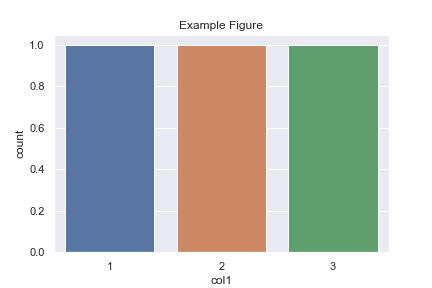

And we can continue our text further here.

In [9]:
%%jmd

The figure is displayed below:

{{ encoded }}

And we can continue our text further here.

We can do the same with **Plotly** or other interactive plotting frameworks.

In [10]:
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])

In [11]:
%%jmd

It is simple to use it with Jinja Markdown.

{{ fig.to_html(include_plotlyjs=False, full_html=False, default_height=400, default_width=600) }}


It is simple to use it with Jinja Markdown.

<div>                            <div id="730dbbdc-b149-4774-9fbf-0d31745fbbc5" class="plotly-graph-div" style="height:400px; width:600px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("730dbbdc-b149-4774-9fbf-0d31745fbbc5")) {                    Plotly.newPlot(                        "730dbbdc-b149-4774-9fbf-0d31745fbbc5",                        [{"alignmentgroup":"True","hovertemplate":"x=%{x}<br>y=%{y}<extra></extra>","legendgroup":"","marker":{"color":"#636efa","pattern":{"shape":""}},"name":"","offsetgroup":"","orientation":"v","showlegend":false,"textposition":"auto","x":["a","b","c"],"xaxis":"x","y":[1,3,2],"yaxis":"y","type":"bar"}],                        {"template":{"data":{"histogram2dcontour":[{"type":"histogram2dcontour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"choropleth":[{"type":"choropleth","colorbar":{"outlinewidth":0,"ticks":""}}],"histogram2d":[{"type":"histogram2d","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmap":[{"type":"heatmap","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmapgl":[{"type":"heatmapgl","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"contourcarpet":[{"type":"contourcarpet","colorbar":{"outlinewidth":0,"ticks":""}}],"contour":[{"type":"contour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"surface":[{"type":"surface","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"mesh3d":[{"type":"mesh3d","colorbar":{"outlinewidth":0,"ticks":""}}],"scatter":[{"fillpattern":{"fillmode":"overlay","size":10,"solidity":0.2},"type":"scatter"}],"parcoords":[{"type":"parcoords","line":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolargl":[{"type":"scatterpolargl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"bar":[{"error_x":{"color":"#2a3f5f"},"error_y":{"color":"#2a3f5f"},"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"bar"}],"scattergeo":[{"type":"scattergeo","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolar":[{"type":"scatterpolar","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"histogram":[{"marker":{"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"histogram"}],"scattergl":[{"type":"scattergl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatter3d":[{"type":"scatter3d","line":{"colorbar":{"outlinewidth":0,"ticks":""}},"marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattermapbox":[{"type":"scattermapbox","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterternary":[{"type":"scatterternary","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattercarpet":[{"type":"scattercarpet","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"carpet":[{"aaxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"baxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"type":"carpet"}],"table":[{"cells":{"fill":{"color":"#EBF0F8"},"line":{"color":"white"}},"header":{"fill":{"color":"#C8D4E3"},"line":{"color":"white"}},"type":"table"}],"barpolar":[{"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"barpolar"}],"pie":[{"automargin":true,"type":"pie"}]},"layout":{"autotypenumbers":"strict","colorway":["#636efa","#EF553B","#00cc96","#ab63fa","#FFA15A","#19d3f3","#FF6692","#B6E880","#FF97FF","#FECB52"],"font":{"color":"#2a3f5f"},"hovermode":"closest","hoverlabel":{"align":"left"},"paper_bgcolor":"white","plot_bgcolor":"#E5ECF6","polar":{"bgcolor":"#E5ECF6","angularaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"radialaxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"ternary":{"bgcolor":"#E5ECF6","aaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"baxis":{"gridcolor":"white","linecolor":"white","ticks":""},"caxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"coloraxis":{"colorbar":{"outlinewidth":0,"ticks":""}},"colorscale":{"sequential":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"sequentialminus":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"diverging":[[0,"#8e0152"],[0.1,"#c51b7d"],[0.2,"#de77ae"],[0.3,"#f1b6da"],[0.4,"#fde0ef"],[0.5,"#f7f7f7"],[0.6,"#e6f5d0"],[0.7,"#b8e186"],[0.8,"#7fbc41"],[0.9,"#4d9221"],[1,"#276419"]]},"xaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"yaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"scene":{"xaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"yaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"zaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2}},"shapedefaults":{"line":{"color":"#2a3f5f"}},"annotationdefaults":{"arrowcolor":"#2a3f5f","arrowhead":0,"arrowwidth":1},"geo":{"bgcolor":"white","landcolor":"#E5ECF6","subunitcolor":"white","showland":true,"showlakes":true,"lakecolor":"white"},"title":{"x":0.05},"mapbox":{"style":"light"}}},"xaxis":{"anchor":"y","domain":[0.0,1.0],"title":{"text":"x"}},"yaxis":{"anchor":"x","domain":[0.0,1.0],"title":{"text":"y"}},"legend":{"tracegroupgap":0},"margin":{"t":60},"barmode":"relative"},                        {"responsive": true}                    )                };                            </script>        </div>

# Code Folding

You might've noticed that there are a lot of `Hide` buttons on the right. This is a functionality called **Code Folding**. It allows us to hide and show code and results in a more dynamic and visually appealing report. There is also a button on the top with `Code All` that allows us to toggle all codes on or off.

This functionality can be tweaked in the notebook's metadata. There is the following property in this notebook's json (open it as text):

```json
"code_folding": "show"
```

Value `show` means that all code cells inputs will be visible at the document load. If we specify value `hide` in there, then all codes will be hidden at the beginning (this is also default when the property is missing). Any other value will result in the Code Folding functionality being turned off, hence all inputs will be visible.

In [12]:
a = 10

# Recommendations and Best Practices

**Use Jinja Markdown instead of basic Markdown cell**

You can hide the input using some kind of extension, so it will not bother you. And the added flexibility is very useful. And the shortcut magic `%%jmd` makes it very efficient.

**Be very careful about HTML tags**

HTML tags are very powerful way and can be used in combination with Markdown. However, if there is a Markdown equivalent, it should be favoured. If you make an error in the HTML tags in the wrong place (e.g. you forget to close `<em>` tag), it can have devastating effects on the output, since it messes up the DOM structure a lot.

**Use headers in order**

Do not use for example first `#`, then `###` and then `##`.Use them in a proper order. It's tempting to use lower header to have smaller letters, but the right way to do it is by styling the header element. Some bad orders can have a negative effect on the quality of the output.